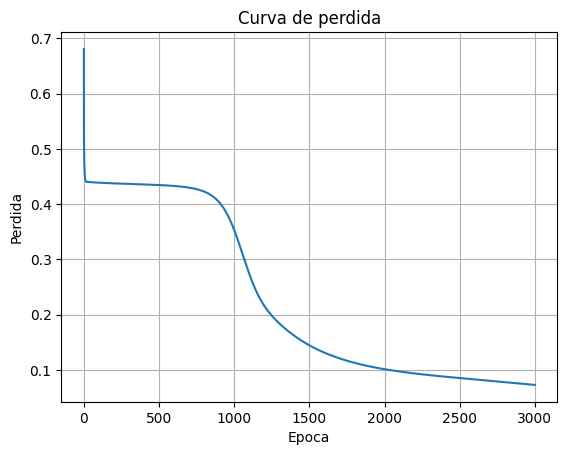

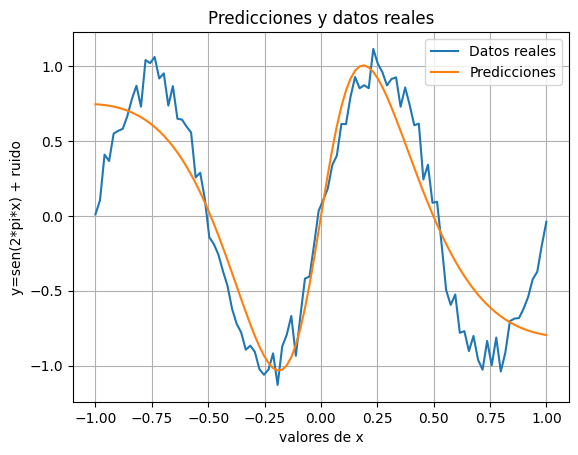

In [1]:
'''Red neuronal definida mediante clases'''
import torch.nn as nn
import torch.optim as optim
import torch
import matplotlib.pyplot as plt

x=torch.linspace(-1,1,100).reshape(-1,1)
y=torch.sin(2*torch.pi*x) + 0.1*torch.randn(x.size())

class SinModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(1,20)
        self.activation1=nn.Tanh()
        self.layer2=nn.Linear(20,1)
    def forward(self,x):
        x=self.layer1(x)
        x=self.activation1(x)
        x=self.layer2(x)
        return x

model=SinModel()
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(), lr=0.1)


losses=[]
for epoca in range(3000):
    optimizer.zero_grad()
    out=model(x)
    loss=criterion(out, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())



#Grafica de perodida
plt.plot(losses)
plt.title('Curva de perdida')
plt.xlabel('Epoca')
plt.ylabel('Perdida')
plt.grid()
plt.show()

#Comparacion de datos reales y predicciones
plt.plot(x.numpy(),y.numpy(), label='Datos reales')
plt.plot(x.numpy(), model(x).detach().numpy(), label='Predicciones')
plt.legend()
plt.title('Predicciones y datos reales')
plt.xlabel('valores de x')
plt.ylabel('y=sen(2*pi*x) + ruido')
plt.grid()
plt.show()


C:\Users\Antonio Rojas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


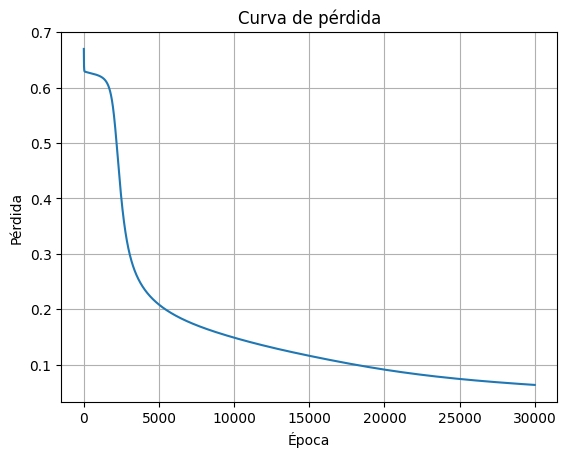

La precision de nuestro modelo: tensor(0.9800)


In [2]:
'''Usar Accuracy'''
from torchmetrics import Accuracy

x=torch.linspace(-1,1,100).reshape(-1,1)
y=(torch.sin(2*torch.pi*x) > 0).float()

class SinModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(1,20)
        self.activation1=nn.Tanh()
        self.layer2=nn.Linear(20,1)
        self.activation2=nn.Sigmoid()
    def forward(self,x):
        x=self.layer1(x)
        x=self.activation1(x)
        x=self.layer2(x)
        x=self.activation2(x)
        return x

model=SinModel()
criterion=nn.BCELoss()
optimizer=optim.SGD(model.parameters(), lr=0.1)


losses=[]
for epoca in range(30000):
    optimizer.zero_grad()
    out=model(x)
    loss=criterion(out, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

#Gráfica de pérdida
plt.plot(losses)
plt.title('Curva de pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.grid()
plt.show()


#Usamos accuracy
acc=Accuracy(task='binary')
model.eval()
with torch.no_grad():
    out=model(x)
    predi=(out>=0.5).float()
    acc(predi, y.view(-1,1))
final_accuracy=acc.compute()
print('La precision de nuestro modelo:',final_accuracy)


In [11]:
x=torch.linspace(-2,2,300).reshape(-1,1)
y=(((x**3)-x)>0).float()

class CubicClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(1,20)
        self.activ1=nn.Tanh()
        self.layer2=nn.Linear(20,1)
        self.activ2=nn.Sigmoid()
    def forward(self, x):
        x=self.layer1(x)
        x=self.activ1(x)
        x=self.layer2(x)
        x=self.activ2(x)
        return x

model1=CubicClassifier()

criterion=nn.BCELoss()
optimizer=optim.SGD(model1.parameters(), lr=0.1)


losses=[]
for epoca in range(300):
    optimizer.zero_grad()
    out=model(x)
    loss=criterion(out, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

acc=Accuracy(task='binary')
model1.eval()
with torch.no_grad():
    out=model1(x)
    predi=(out>=0.5).float()
    acc(predi, y)
accuracy_total=acc.compute()
